# Quantification des incertitudes - Solution


In [1]:
import numpy as np
import openturns as ot

In [2]:
data = ot.Sample.ImportFromCSVFile("sample_E.csv")
data.setDescription(["Young Modulus"])
n = data.getSize()
print("Sample size=%d" % (n))

Sample size=229


In [3]:
data[0:10]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=10 dimension=1 description=[Young Modulus] data=[[2.99532e+07],[2.86804e+07],[3.06412e+07],[3.2051e+07],[3.77857e+07],[3.79726e+07],[3.70693e+07],[3.01798e+07],[3.72172e+07],[2.92682e+07]]

## Question 1 : statistiques descriptives

- Calculer les principales caractéristiques de l'échantillon: moyenne, écart-type, médiane, minimum, maximum, intervalle inter-quartiles (i.e. à 25% et 75%)

## Solution de la question 1 : statistiques descriptives


In [4]:
print (" Size                  = %d"    % data.getSize())
print (" Mean                  = %.12g" % data.computeMean()[0])
print (" Standard deviation    = %.12g" % data.computeStandardDeviation()[0, 0])
print (" Median                = %.12g" % data.computeQuantile(.5)[0])
print (" Interquartile         = [%.12g, %.12g]" % (data.computeQuantile(0.25)[0],\
                                                    data.computeQuantile(0.75)[0]))
print (" Range                 = [%.12g, %.12g]" % (data.getMin()[0], data.getMax()[0]))

 Size                  = 229
 Mean                  = 33874362.4266
 Standard deviation    = 4545144.14657
 Median                = 33085407.5372
 Interquartile         = [29870018.0704, 36896931.4922]
 Range                 = [28008548.0287, 48115184.6478]


## Question 2 : histogramme empirique

- Utiliser la classe `HistogramFactory` pour dessiner l'histogramme empirique de l'échantillon.

## Solution de la question 2 : histogramme empirique

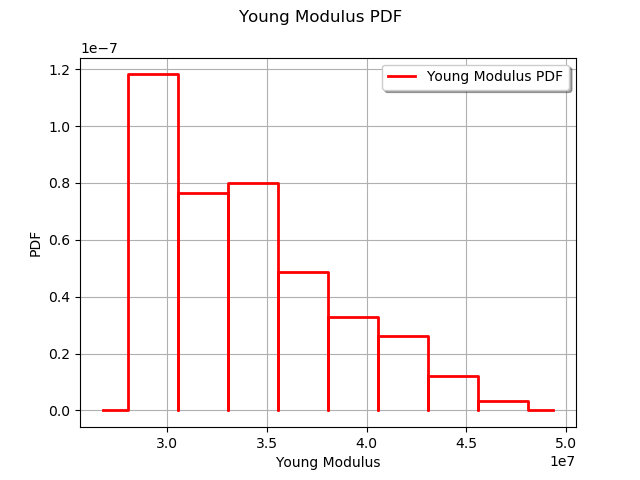

In [5]:
ot.HistogramFactory().build(data).drawPDF()

## Question 3 : ajuster une loi beta

* Utiliser la classe `BetaFactory` pour estimer les paramètres de la loi Beta s'ajustant au données. 
* Desinner la PDF de cette loi ajustée.
* Afficher les paramètres estimés.

## Solution de la question 3 : ajuster une loi beta

Let us first estimate a `Beta`distribution:

In [6]:
E = ot.BetaFactory().build(data)

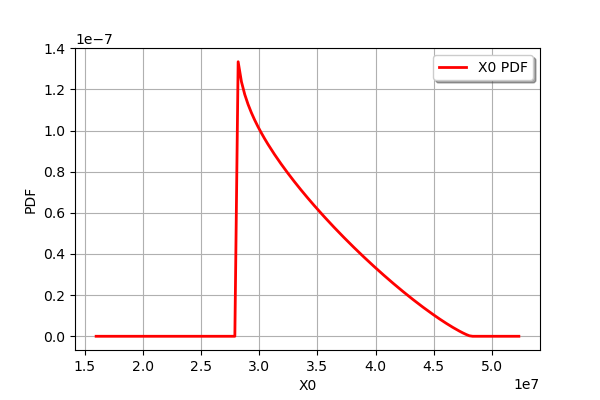

In [7]:
E.drawPDF()

In [8]:
E.getParametersCollection()[0]

class=PointWithDescription name=X0 dimension=4 description=[alpha,beta,a,b] values=[0.91834,2.21034,2.79215e+07,4.82022e+07]

## Question 4 : réaliser le test de Kolmogorov-Smirnov

- Utiliser la classe `FittingTest.Kolmogorov` pour réaliser le test de Kolmogorov-Smirnov. 
- Calculer la p-valeur.
- Doit-on rejeter la loi beta ou non ?

## Solution de la question 4 : réaliser le test de Kolmogorov-Smirnov

Puisque les paramètres ont étés estimés sur l'échantillon, il faut utiliser le constructeur fondé sur une `Factory`.

In [9]:
ot.ResourceMap.SetAsUnsignedInteger("FittingTest-KolmogorovSamplingSize",1000)

In [10]:
betafact = ot.BetaFactory()

In [11]:
fitted_dist, test_result = ot.FittingTest.Kolmogorov(data, betafact)

In [12]:
fitted_dist

class=Beta name=Beta dimension=1 alpha=0.91834 beta=2.21034 a=2.79215e+07 b=4.82022e+07

In [13]:
test_result.getPValue()

0.776

In [14]:
test_result.getThreshold()

0.05

In [15]:
test_result.getBinaryQualityMeasure()

True

La p-valeur est égale à 0.78, ce qui implique que la distribution Beta ne peut pas être rejetée.

## Question 5 : QQ-plot

- Utiliser la classe `VisualTest_DrawQQplot` pour dessiner le qq-plot. 
- L'ajustement est-il satisfaisant ?

## Solution de la question 5 : QQ-plot

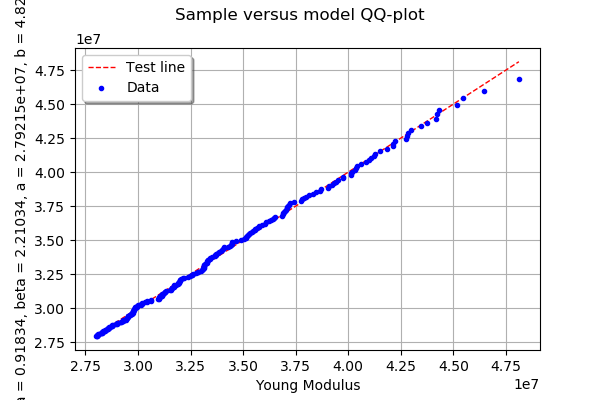

In [16]:
ot.VisualTest_DrawQQplot(data, E)

On constate que l'ajustement est satisfaisant, à l'exception peut-être des valeurs les plus grandes de $E$. 

## Question 6 : sélection de modèle par le critère BIC

On souhaite déterminer quelle loi s'ajuste le mieux au sens du critère BIC. 

- Comparer les lois suivantes du point de vue du critère : uniforme, gaussienne, beta, log-normale. Quelle est la loi qui est la meilleure du point de vue du critère BIC ?
- La méthode `FittingTest_BestModelBIC` permet de renvoyer la distribution réalisant le meilleur critère BIC dans une liste de distributions candidates. Pour créer cette liste, on peut utiliser la méthode `GetContinuousUniVariateFactories`. Quelle distribution ressort de cette méthode ? Est-elle satisfaisante du point de vue du QQ-Plot ?

## Solution de la question 6 : sélection de modèle par le critère BIC

In [17]:
bic = ot.FittingTest.BIC(data, E)
bic

33.11173911943841

In [18]:
for factory in [ot.UniformFactory(), ot.NormalFactory(),ot.BetaFactory(),ot.LogNormalFactory()]:
    T = factory.build(data)
    name = T.getName()
    bic = ot.FittingTest.BIC(data, T)
    print("%s : %.4f" % (name,bic))

Uniform : 33.6504
Normal : 33.4927
Beta : 33.1117
LogNormal : 33.3579


Echoue avec boost : https://github.com/openturns/openturns/issues/1331

In [19]:
tested_distributions = ot.DistributionFactory().GetContinuousUniVariateFactories()
#dist, test_result = ot.FittingTest_BestModelBIC(data,tested_distributions)
#dist

In [20]:
#ot.VisualTest_DrawQQplot(data, dist)

On observe que la loi log-normale s'ajuste plutôt bien aux données, à l'exception peut-être des valeurs les plus grandes de $E$. 

## Question 7 : histogramme

- Utiliser la classe `HistogramFactory` pour créer la distribution de type histogramme qui s'ajuste aux données. 
- Utiliser le QQ-plot pour valider graphiquement cette distribution. 
- Quelle est la limite de cette technique ?
- L'histogramme est-il une distribution satisfaisante de ce cas particulier ? Dans quel type d'études cette méthode pourrait convenir ?

## Solution de la question 7 : histogramme


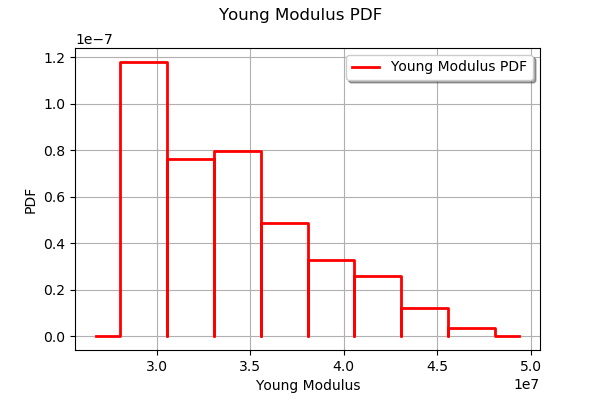

In [21]:
histogram = ot.HistogramFactory().build(data)
histogram.drawPDF()

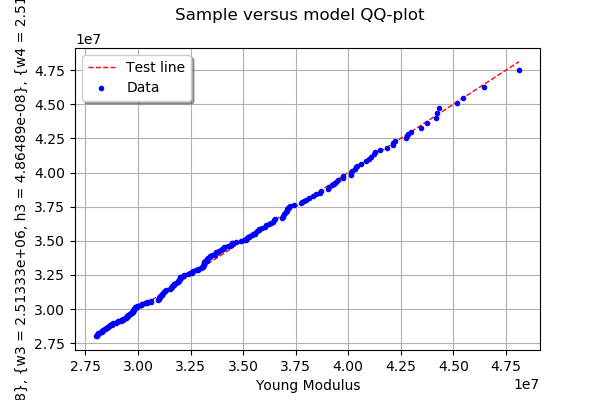

In [22]:
ot.VisualTest_DrawQQplot(data, histogram)

On observe que l'histogramme est plutôt satisfaisant, pour toutes les valeurs de l'échantillon. 

L'histogramme est une méthode intéressante, mais ne permet pas de générer des valeurs qui sont au-delà de l'échantillon. 

C'est une méthode qui peut être intéressante lorsqu'on dispose de beaucoup de données ou bien que l'étude est plutôt une étude de type tendance centrale. Si, au contraire, on possède peu de données ou bien que l'on s'intéresse aux extrêmes, alors l'histogramme ne peut pas convenir.

## Question 8 : méthode à noyau

- Utiliser la classe `KernelSmoothing` pour utiliser une méthode à noyau pour estimer la distribution. 
- Utiliser le QQ-Plot pour valider le résultat graphiquement.

## Solution de la question 8 : méthode à noyau

In [23]:
ks = ot.KernelSmoothing().build(data)

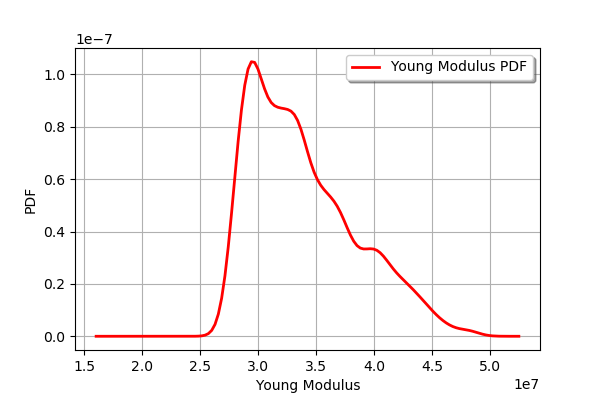

In [24]:
ks.drawPDF()

## Question 9 : synthèse

On souhaite comparer les trois distributions suivantes :
- la distribution Beta 
- la distribution issue de l'estimation à noyau 
- l'histogramme empirique

Comparer ces distributions du point de vue de la PDF : 
- quelles différences observez-vous ?
- quelle semble être la loi la plus appropriée ?

## Solution de la question 9 : synthèse

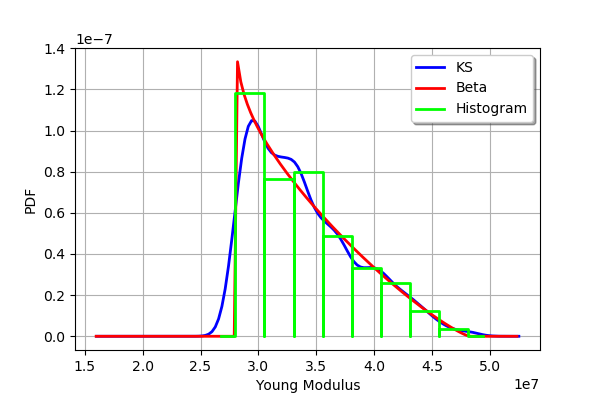

In [25]:
K = ot.KernelSmoothing().build(data)
graphks = K.drawPDF()
graphks.setLegends(["KS"])
graphks.setColors(["blue"])
#
E = ot.BetaFactory().build(data)
graphE = E.drawPDF()
graphE.setLegends(["Beta"])
graphE.setColors(["red"])
#
H = ot.HistogramFactory().build(data)
graphH = H.drawPDF()
graphH.setLegends(["Histogram"])
graphH.setColors(["green"])
#
graphks.add(graphE)
graphks.add(graphH)
graphks

On observe que la loi fondée sur l'estimation à noyau est moins régulière. On observe qu'ele est susceptible de générer des valeurs inférieures à $E=28 \times 10^6$, alors qu'aucune donnée de ce type ne figure dans l'échantillon.

De toute évidence, c'est la loi Beta qui s'ajuste le mieux à ces données.